# Libraries

In [2]:
import numpy as np
import scipy as sp
from numpy.linalg import solve
from numpy.linalg import qr
from numpy.linalg import svd
from scipy.linalg import diagsvd
from scipy.linalg import pinv
from scipy.linalg import ldl
from numpy.linalg import cholesky
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Instructions

Let:<br>
$A = $ `np.random.randint(1, 5, size = (5,3))`, <br>
$b = $ `np.random.randint(1, 5, size = (5,1))`, and<br>
$c = $ `np.random.randint(1, 5, size = (3,1))`.

In [3]:
A = np.random.randint(1, 5, size = (5,3))
b = np.random.randint(1, 5, size = (5,1))
c = np.random.randint(1, 5, size = (3,1))

m = 5
n = 3

print(f'"{A}\n\n{b}\n\n{c}')

"[[2 2 4]
 [4 4 4]
 [2 2 4]
 [1 2 1]
 [3 3 4]]

[[1]
 [2]
 [4]
 [2]
 [2]]

[[1]
 [3]
 [2]]


These were the exact matrices I randomly generated for the test. They happened to be usable with Cholesky's in the later questions.

In [4]:
A_tested = np.array([[2,3,3],[3,4,4],[2,1,1],[4,3,1],[3,1,3]])
b_tested = np.array([[3],[4],[3],[4],[3]])
c_tested = np.array([[1],[2],[3]])

linebreak = "------------------------------------"

# Questions

## Question 1
### From the $SVD$ of $A$, find the Pseudo-Inverse of $A$ and use it to solve $Ax=b$.

In [5]:
U, sigma, VT = svd(A)
Sigma = diagsvd(sigma, m, n)

PseudoA = VT.T @ pinv(Sigma) @ U.T
#PseudoA @ A

x = PseudoA @ b

print(x)

[[-1.79545455]
 [ 1.52272727]
 [ 0.75      ]]


$$x = \begin{bmatrix}.8\overline{6} \\ .218 \\ .151\end{bmatrix}$$

## Question 2
### Explain why the rank of A cannot be 5. What is the rank of A; and why?

The rank of A cannot be 5 because the matrix is overdetermined i.e., there are more rows (5) than columns (3). For the reason, the rank of the matrix is 3. Besides calling a library to determine it, you can also see the Sigma from the SVD decomposition to see there are only 3 eigenvalues.

In [6]:
print(np.linalg.matrix_rank(A), len(sigma))

3 3


## Question 3
### Find the $QR$ factorization of A and use it to solve $Ax=b$.

In [7]:
Q, R = qr(A)

x = solve(R, Q.T @ b)
x

array([[-1.79545455],
       [ 1.52272727],
       [ 0.75      ]])

$$x = \begin{bmatrix}.8\overline{6} \\ .218 \\ .151\end{bmatrix}$$

## Question 4
### Find the eigenvalues of $A^TA$. Is $A^tA$ postive definite and why? What do you know about the eigenvalues of $AA^T$?

In [8]:
AtransposeA = A.T @ A

np.linalg.eigvals(AtransposeA)

array([132.17422828,   0.3872527 ,   3.43851902])

The eigenvalues were $\begin{bmatrix}104.817\\5.864\\3.319\end{bmatrix}$. Because there were positive and $A^TA$ is symmetric, the matrix is positive definite. The eigenvalues of $AA^T$ are the same, with the excess being 0.

In [9]:
np.linalg.eigvals(A@A.T)

array([ 1.32174228e+02,  3.43851902e+00,  3.87252699e-01, -1.36722046e-16,
        1.00794486e-15])

## Question 5
### Solve $A^TAy = c$ using the $LDL^T$ factorization.

In [10]:
L, D, P = ldl (AtransposeA)

#solve(AtransposeA, c)

step1 = solve(L, c)
step2 = solve(D, step1)
y = solve(L.T, step2)

print(f"\
First step\n\
{linebreak}\n\
Solve Lw = c for w\n\
{linebreak}\n\
{step1}\n\
Second step\n\
{linebreak}\n\
Solve Dx = w for x\n\
{linebreak}\n\
{step2}\n\
Last step\n\
{linebreak}\n\
Solve L^Ty = x for y\n\
{linebreak}\n\
{y}")

First step
------------------------------------
Solve Lw = c for w
------------------------------------
[[1.        ]
 [1.97058824]
 [1.33333333]]
Second step
------------------------------------
Solve Dx = w for x
------------------------------------
[[0.02941176]
 [2.03030303]
 [0.25      ]]
Last step
------------------------------------
Solve L^Ty = x for y
------------------------------------
[[-2.47727273]
 [ 2.11363636]
 [ 0.25      ]]


$$y = \begin{bmatrix}-0.1\overline{6}\\0.037\\0.203\end{bmatrix}$$

## Question 6
### Solve $A^TAy=c$ using the Cholesky factorization. If the factorization cannot be applied, explain why.

In [11]:
L = cholesky(AtransposeA)
w = solve(L, c)
y = solve(L.T, w)

print(y)

[[-2.47727273]
 [ 2.11363636]
 [ 0.25      ]]


As above: $$y = \begin{bmatrix}-0.1\overline{6}\\0.037\\0.203\end{bmatrix}$$ The reason Cholesky's may not work is due to a lack of positive definiteness.

## Question 7
Given the data points $$(-1,0), (0,1), (1,2), (2,4)$$ derive the least-squares line equation $y=mx+b$ that best fits the given data points. Solve the system of equations using:
1. the Normal equations
2. the QR factorization
3. the SVD

In [12]:
A = np.matrix([[-1,1],[0,1],[1,1],[2,1]])
b = np.matrix([0,1,2,4]).T

print(A)
print(b)

[[-1  1]
 [ 0  1]
 [ 1  1]
 [ 2  1]]
[[0]
 [1]
 [2]
 [4]]


The matrix created from the data points:
$$\begin{bmatrix}-1, 1\\0, 1\\1, 1\\2, 1\end{bmatrix}
\begin{bmatrix}m \\ b\end{bmatrix}=\begin{bmatrix}0 \\1 \\2 \\4\end{bmatrix}$$

#### Normal Equations
The normal equation is that which minimizes the sum of the square differences between the left and right sides:<br>
$$
A^TAx = A^Tb
$$

Just use `solve()` with the composite parts of the above matrix. There are many different ways to solve this but this will work.

In [13]:
solvex = solve(A.T @ A, A.T @ b)
print(solvex)

[[1.3]
 [1.1]]


$$x = \begin{bmatrix}1.3 \\ 1.1\end{bmatrix}$$

#### QR factorization
To solve using $QR$ factorization, we first factor $A$ as $QR$. <br>
Next, we pre-multiply with $Q^T$, giving $Rx=Q^Tb$ ($Q^TQ$ is the identity matrix)<br>
Now, we can call `solve()` with $R$ and $Q^Tb$

In [14]:
Q,R = qr(A)
solve(R, Q.T @ b)

matrix([[1.3],
        [1.1]])

$$x = \begin{bmatrix}1.3 \\ 1.1\end{bmatrix}$$

#### SVD factorization
To solve using $SVD$ factorization, we first factor $A$ as $SVD$.    
Now, we create the pseudo-inverse by taking the transpose of the the parts in reverse order, except with $\Sigma$, we take the take the  reciprocals before transposing.    
Last, we can call pre-multiply $b$ with $A^\dagger$, as $A^\dagger A$ is the identity matrix

$$
Ax = b \\
U \Sigma V^T x = b \\
A^\dagger = V \Sigma^\dagger U^T \\
A^TA = I \\
Ix = A^\dagger b \\
x = A^\dagger b \space\space \text{or} \space\space V \Sigma^\dagger U^T b
$$

In [15]:
U, sigma, VT = svd(A)
Sigma = diagsvd(sigma, len(A), len(A.T))
PseudoA = (VT).T @ pinv(Sigma) @ U.T 

x = PseudoA @  b
print(x)

[[1.3]
 [1.1]]


$$x = \begin{bmatrix}1.3 \\ 1.1\end{bmatrix}$$

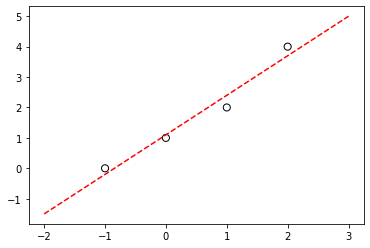

In [16]:
X1 = np.array(A[:,0])
Y1 = np.array(b)
x = np.linspace(-2,3,5)
y = (1.3)*x+(1.1)
plt.scatter(X1,Y1, edgecolor='k',c='none',s=50)
plt.plot(x,y, "r--")

### Let $$f\left(\begin{bmatrix}x\\y\end{bmatrix}\right) = (x - 2y +1)^2 + (y-2x+1)^2 + 1$$

## Question 8
Find the Gradient and the Hessian of $f$.

#### Gradient

$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}\end{bmatrix} \\
\frac{\partial f}{\partial x} \left((x-2y+1)^2 + (y-2x +1)^2 + 1\right) = 10x-8y+2 \\
\frac{\partial f}{\partial y} \left((x-2y+1)^2 + (y-2x +1)^2 + 1\right)  = -8x+10y-2 \\
\nabla f = \begin{bmatrix} 10x-8y+2 \\ -8x+10y-2\end{bmatrix}$$

#### Hessian

$$\bf H_f = 
\begin{bmatrix}
\frac{\partial^2f}{\partial x^2} & \frac{\partial^2f}{\partial x\partial y} \\
\frac{\partial^2f}{\partial y\partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}$$



\begin{align*}
\frac{\partial^2f}{\partial x^2} &= 10 \\
\frac{\partial^2f}{\partial y\partial x} &= -8 \\
\frac{\partial^2f}{\partial y\partial x} &=  -8\\
\frac{\partial^2 f}{\partial y^2} &= 10
\end{align*}


This makes the Hessian:
$$
\bf {H}_f = \begin{bmatrix} 10 &-8 \\ -8 &10\end{bmatrix}
$$

## Question 9
Starting at $\begin{bmatrix}x^0\\y^0\end{bmatrix} = \begin{bmatrix}5\\5\end{bmatrix}$, apply **one step** of Newton's Method to find $\begin{bmatrix}x^1\\y^1\end{bmatrix}$ and $f\left(\begin{bmatrix}x^1\\y^1\end{bmatrix}\right)$

## Question 10
Fromt `SCIPIY.OPTIMIZE` select **ONE** optimization method that requires the use of the Gradient and the Hessian to minimize the function.

In [17]:
def f(x):
    return ((x[0]- 2*x[1] + 1)**2 + (x[1] - 2*x[0] + 1)**2 + 1)

def gradient(x):
    return np.array([10*x[0]-8*x[1]-2, -8*x[0]+10*x[1]-2])

def hessian(x):
    return np.array([[10, -8], [-8, 10]])

starting_points = [np.random.randint(-20,20, size = (1,2)) for i in range(3)]

In [18]:
for x in enumerate(starting_points):
    result = minimize(f, x[1], method = 'dogleg',jac = gradient, hess = hessian, tol = 1.e-7) 
    
    print(linebreak)
    print('Test Run', x[0] + 1, ':')
    print(linebreak)

    print('Starting Value Used: ', x[1])
    print("The Minimum Occurs at (x, y) = ", result.x)
    print("The Minimum Value = ", f(result.x).round(3))
    
    print("Other Statistics:") 
    print(result) 
    print(linebreak)
    print(linebreak)
    print('\n')

------------------------------------
Test Run 1 :
------------------------------------
Starting Value Used:  [[3 3]]
The Minimum Occurs at (x, y) =  [1. 1.]
The Minimum Value =  1.0
Other Statistics:
     fun: 1.0
    hess: array([[10, -8],
       [-8, 10]])
     jac: array([0., 0.])
 message: 'Optimization terminated successfully.'
    nfev: 3
    nhev: 2
     nit: 2
    njev: 3
  status: 0
 success: True
       x: array([1., 1.])
------------------------------------
------------------------------------


------------------------------------
Test Run 2 :
------------------------------------
Starting Value Used:  [[ 0 18]]
The Minimum Occurs at (x, y) =  [1. 1.]
The Minimum Value =  1.0
Other Statistics:
     fun: 1.0
    hess: array([[10, -8],
       [-8, 10]])
     jac: array([-3.55271368e-15, -3.55271368e-15])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 5
     nit: 5
    njev: 6
  status: 0
 success: True
       x: array([1., 1.])
------------------------

The minimum is found at $(-0.\overline{1}, 0.\overline{1})$ with a value of 3.222.